<a href="https://colab.research.google.com/github/Latamila/Scikit-learn_estudos_casos/blob/main/Netflix_sistema_recomendacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles (1).csv



#Dataset -Description
---
- show_id - numeric Value of Shows available in Netflix
- type - Type of show avilable on Netflix - Movie and TV show
- title- Title of show avilable on Netflix
- director- Direcots listed in Movie and TV show
- cast - Actor and Actress
- country- Origin country of the show
- date_added -Year when conted added to Netflux
- release_year - Relase year of the Show
- rating - Rating given by the users
- duration - Duration of the show avilable on Netflix
- listed_in- When the show avilable on netflix
- description- - Decription given by Usera

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import plotting

#plotly
import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.express as px

In [3]:
df = pd.read_csv('netflix_titles.csv')

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.shape

(8807, 12)

#Visualizando o porcentagem de valores faltantes do dataset
---

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

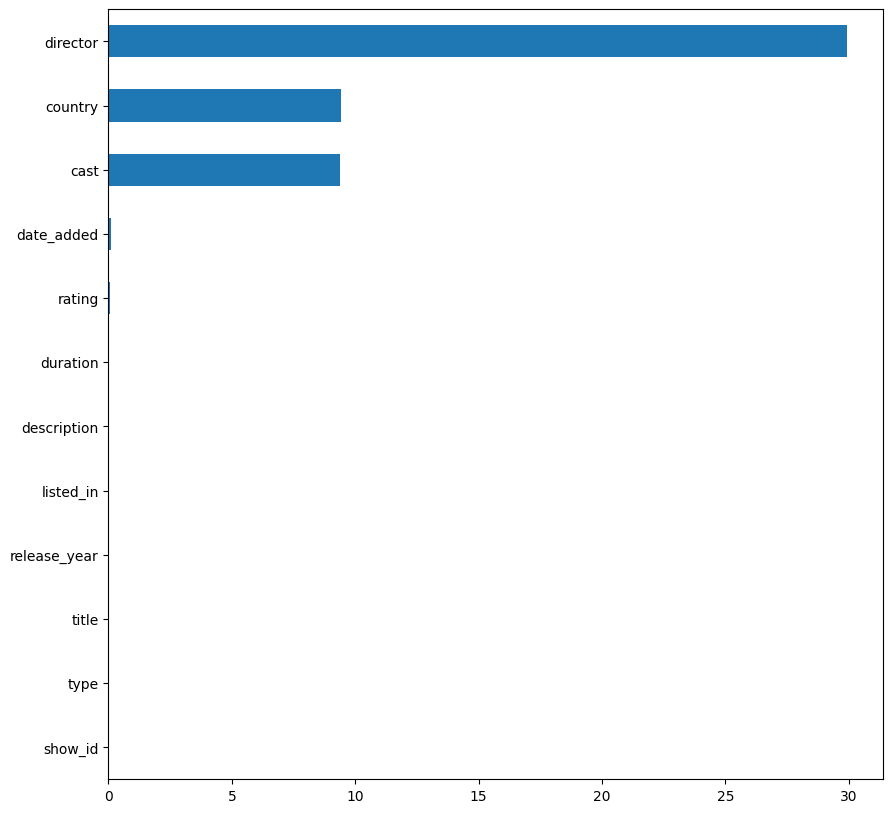

In [6]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=True).plot(kind='barh',figsize=(10,10))
plt.grid(b=True, which='both')

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

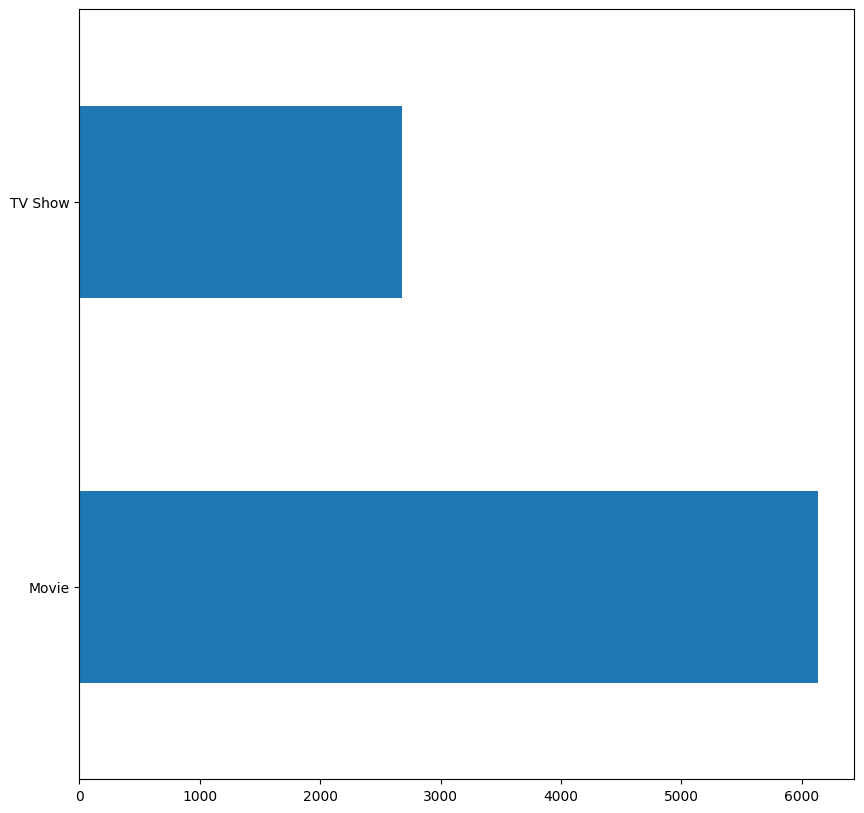

In [7]:
df['type'].value_counts().plot(kind='barh', figsize=(10,10))
plt.grid(b=True, which='both')

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

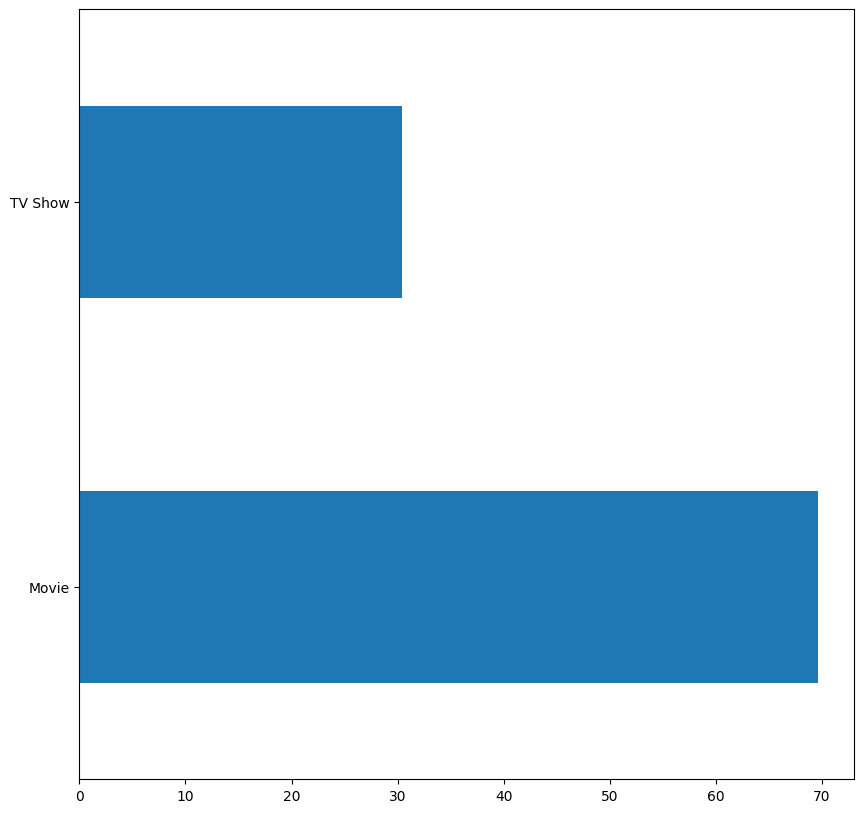

In [8]:
((df['type'].value_counts()/len(df))*100).plot(kind='barh', figsize=(10,10))
plt.grid(b=True, which='both')

#Contagem por tipo
---
- Contagem entre filmes e shows de TV
- Como se vê a maioria são filmes
- 70% de filmes e 30 % de shows de TV

In [7]:
df.isnull().any().any()

#checa se há qualquer nulo ou não

#E como podemos ver há valores nulos.

True

#Plotando as diferentes classificações no dataset
---

In [8]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

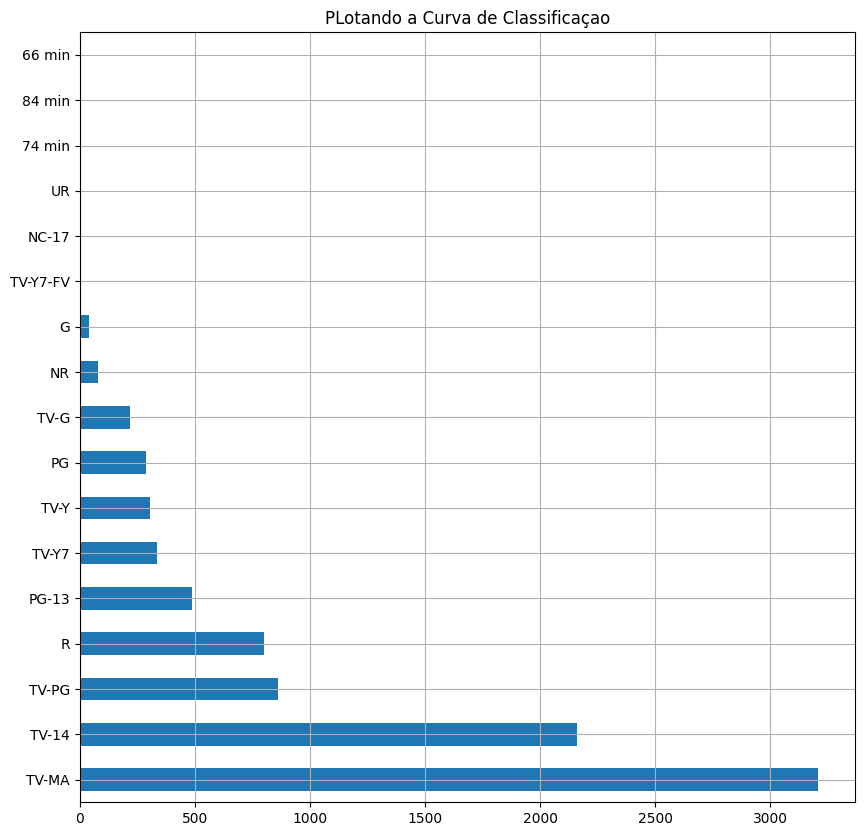

In [15]:
df['rating'].value_counts().plot(kind='barh', figsize=(10,10))
plt.grid()
plt.title("PLotando a Curva de Classificaçao")
plt.show()

#Inferência
---
- Existem apenas 14 classificações diferentes no dataset
- A classificação máxima é "TV-MA", sua contagem é superior a 2.863
- Então -TV-14 - a contagem é 1931
- Menos é NC-17, a contagem é 3

In [9]:
x=df['type'].value_counts()
x

Movie      6131
TV Show    2676
Name: type, dtype: int64

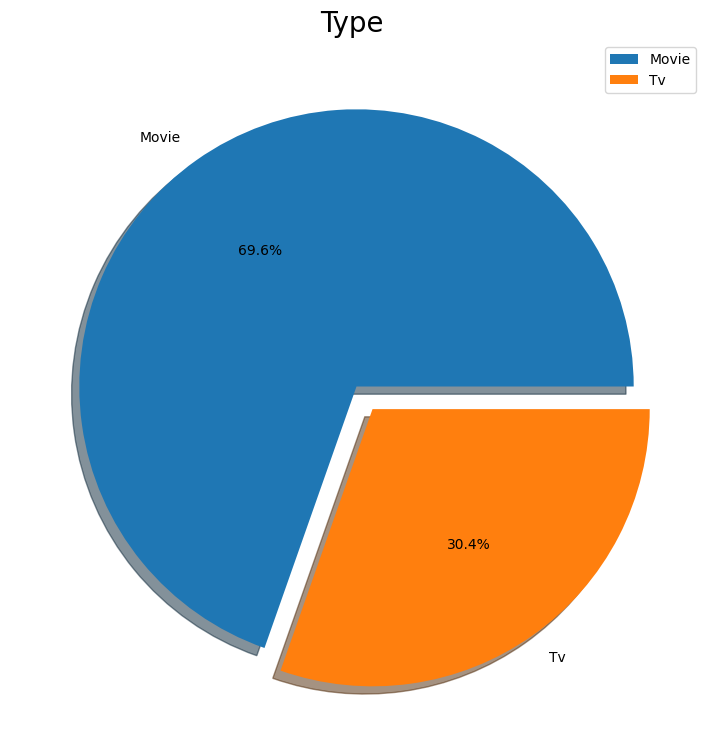

In [10]:
plt.rcParams['figure.figsize'] = (9, 9)
labels=['Movie', 'Tv']
plt.pie(x, explode=(0,0.1), labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Type ', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [18]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
df['date_added']=pd.to_datetime(df['date_added'])
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month

In [12]:
df['duration'] = df['duration'].astype(str)

In [13]:
df['season_counts'] = df.apply(lambda x: x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis=1)
df['duration'] = df.apply(lambda x: x['duration'].split(' ')[0] if 'Season' in x['duration'] else '', axis=1)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_counts
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8807 non-null   object        
 1   type           8807 non-null   object        
 2   title          8807 non-null   object        
 3   director       6173 non-null   object        
 4   cast           7982 non-null   object        
 5   country        7976 non-null   object        
 6   date_added     8797 non-null   datetime64[ns]
 7   release_year   8807 non-null   int64         
 8   rating         8803 non-null   object        
 9   duration       8807 non-null   object        
 10  listed_in      8807 non-null   object        
 11  description    8807 non-null   object        
 12  year_added     8797 non-null   float64       
 13  month_added    8797 non-null   float64       
 14  season_counts  8807 non-null   object        
dtypes: datetime64[ns](1),

Obs.
- Como podemos ver que o conteúdo adicionado ao longo do mês
- Durante janeiro o filme adicionado é mais
- Durante o mês de dezembro o programa de TV adicionado é mais

In [33]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'season_counts'],
      dtype='object')

In [14]:
small = df.sort_values("release_year", ascending = True)
small = small[small['season_counts'] != ""]
small[['title', "release_year"]][:15]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
1331,Five Came Back: The Reference Films,1945
7743,Pioneers of African-American Cinema,1946
8541,The Twilight Zone (Original Series),1963
8189,The Andy Griffith Show,1967
4550,Monty Python's Fliegender Zirkus,1972
4551,Monty Python's Flying Circus,1974
6549,Dad's Army,1977
6674,El Chavo,1979
7588,Ninja Hattori,1981


In [15]:
small = df.sort_values("release_year", ascending = True)
small = small[small['release_year'] != ""]
small[['title', "release_year"]][:15]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
7930,San Pietro,1945


In [16]:
netflix_shows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']

In [18]:
#tv shows mai antigos
small = netflix_shows.sort_values("release_year", ascending = True)
small = small[small['release_year'] != ""]
small[['title', "release_year"]][:15]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
1331,Five Came Back: The Reference Films,1945
7743,Pioneers of African-American Cinema,1946
8541,The Twilight Zone (Original Series),1963
8189,The Andy Griffith Show,1967
4550,Monty Python's Fliegender Zirkus,1972
4551,Monty Python's Flying Circus,1974
6549,Dad's Army,1977
6674,El Chavo,1979
7588,Ninja Hattori,1981


In [19]:
#filmes mais antigos
small = netflix_movies.sort_values("release_year", ascending = True)
small = small[small['release_year'] != ""]
small[['title', "release_year"]][:15]

,title,release_year
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8763,WWII: Report from the Aleutians,1943
8739,Why We Fight: The Battle of Russia,1943
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
7575,Nazi Concentration Camps,1945
7930,San Pietro,1945


<ipython-input-20-440574463324>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




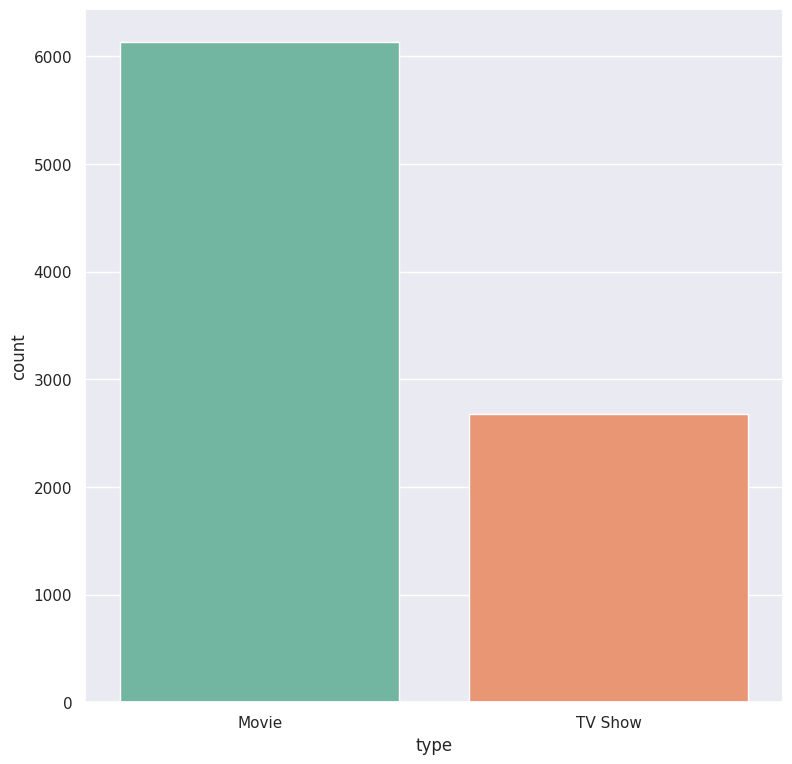

In [20]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set2")

<ipython-input-21-6441c0d408e2>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




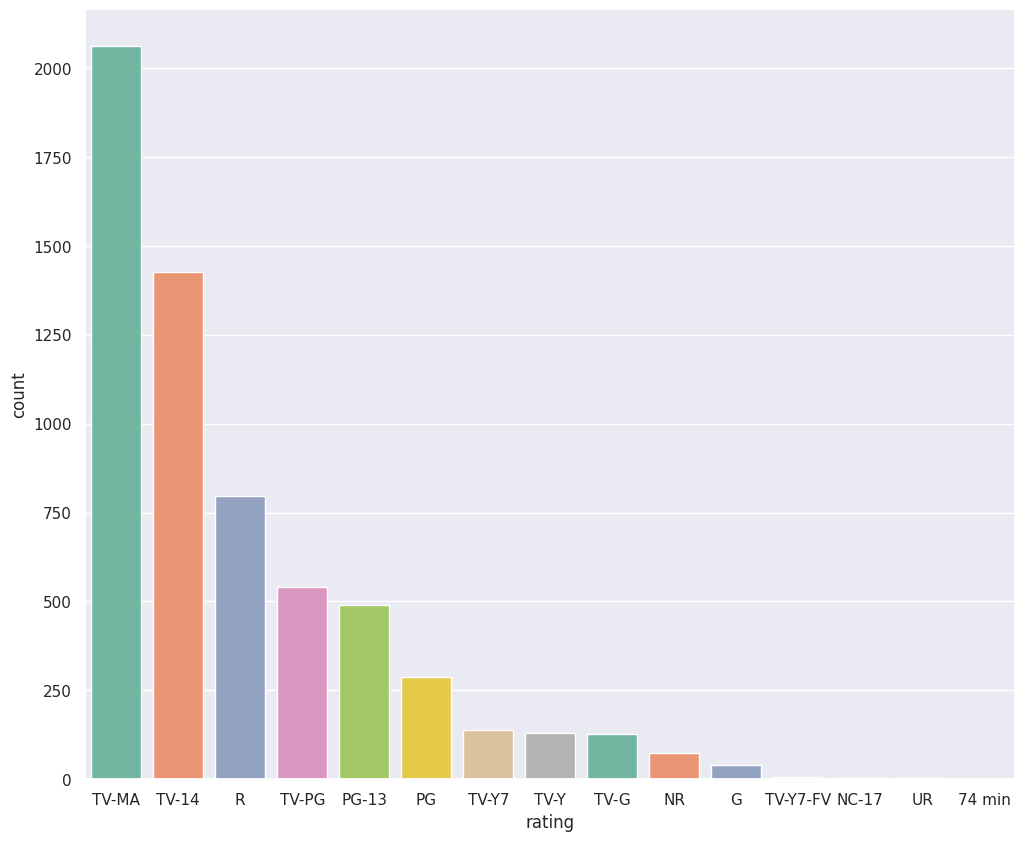

In [21]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

- A maior contagem de filmes é feita com a classificação 'TV-MA'. "TV-MA" é uma classificação atribuída pelas Diretrizes dos Pais da TV a um programa de televisão projetado apenas para o público adulto.
- O segundo maior é o 'TV-14', que significa conteúdo que pode ser impróprio para crianças menores de 14 anos de idade.
- A terceira maior é a muito popular classificação 'R'. Um filme com classificação R é aquele que foi avaliado como tendo material que pode ser inadequado para crianças menores de 17 anos pela Motion Picture Association of America; a MPAA escreve "Menores de 17 anos exigem acompanhamento dos pais ou responsável adulto".

<ipython-input-22-00257fe57256>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




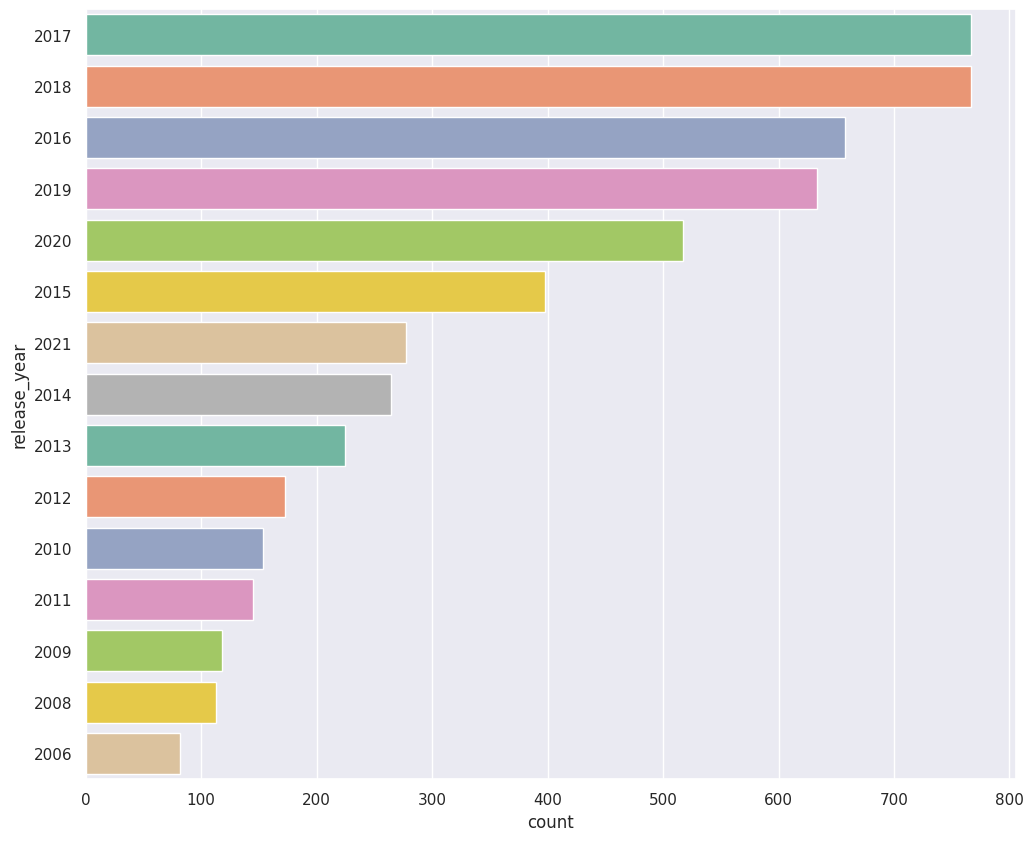

In [22]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

Então, 2017 foi o ano em que a maioria dos filmes foram lançados.

In [23]:
countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [24]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no

countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

<ipython-input-25-8892c2647d47>:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'France'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Belgium'),
 Text(6, 0, 'China'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'India')]

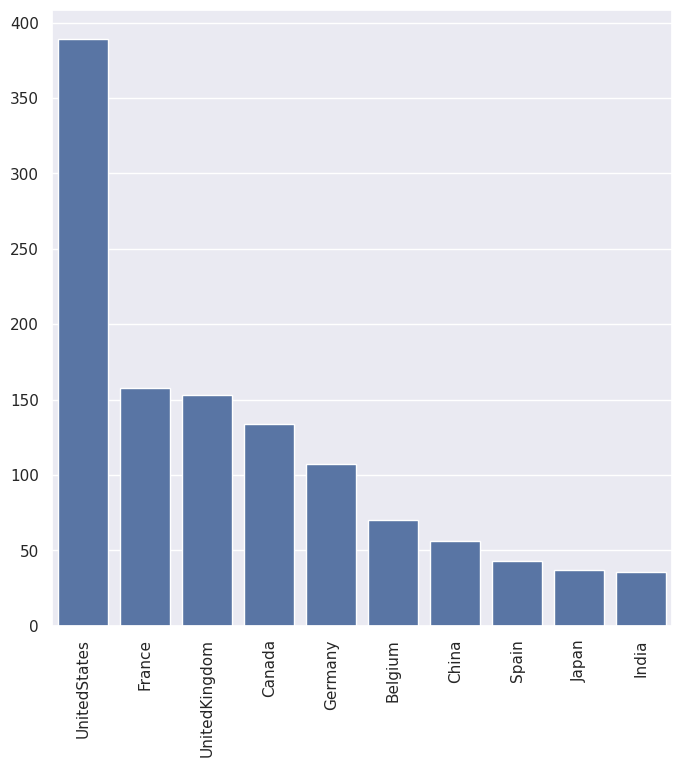

In [25]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

In [26]:
netflix_movies['duration']


0        
6        
7        
9        
12       
       ..
8801     
8802     
8804     
8805     
8806     
Name: duration, Length: 6131, dtype: object

In [27]:
netflix_shows['duration']

1       2
2       1
3       1
4       2
5       1
       ..
8795    2
8796    2
8797    3
8800    1
8803    2
Name: duration, Length: 2676, dtype: object

In [29]:
netflix_shows['duration']=netflix_shows['duration'].astype(str).astype(int)

In [30]:
df.isnull().sum()


show_id             0
type                0
title               0
director         2634
cast              825
country           831
date_added         10
release_year        0
rating              4
duration            0
listed_in           0
description         0
year_added         10
month_added        10
season_counts       0
dtype: int64

In [31]:
for i in df.columns:
    null_rate=df[i].isnull().sum()/len(df)*100
    if null_rate>0:
        print("{} 's null rate {}%".format(i, round(null_rate,2)))

director 's null rate 29.91%
cast 's null rate 9.37%
country 's null rate 9.44%
date_added 's null rate 0.11%
rating 's null rate 0.05%
year_added 's null rate 0.11%
month_added 's null rate 0.11%


In [32]:
df.nunique()

show_id          8807
type                2
title            8807
director         4528
cast             7692
country           748
date_added       1714
release_year       74
rating             17
duration           16
listed_in         514
description      8775
year_added         14
month_added        12
season_counts      16
dtype: int64

In [33]:
rating_replacements = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA '
}

for id, rate in rating_replacements.items():
    df.iloc[id, 8] = rate

df['rating'].isnull().sum()

4

In [34]:
df['rating']

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [35]:
df=df[df["date_added"].notna()]

In [36]:
df.isnull().sum()

show_id             0
type                0
title               0
director         2624
cast              825
country           830
date_added          0
release_year        0
rating              4
duration            0
listed_in           0
description         0
year_added          0
month_added         0
season_counts       0
dtype: int64

In [37]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
#preenche a coluna pais com o mais pais mais comum

In [38]:
df['country'].nunique()

748

In [39]:
df['Principal_country']=df['country'].apply(lambda x: x.split(",")[0])
df['Principal_country'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: Principal_country, dtype: object

In [40]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_counts,Principal_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,,United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1,United States
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1,United States
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2,India


In [41]:
df['Principal_country'].nunique()

86

Agora ha apenas 86 paises unicos.

In [42]:
df.isnull().sum()

show_id                 0
type                    0
title                   0
director             2624
cast                  825
country                 0
date_added              0
release_year            0
rating                  0
duration                0
listed_in               0
description             0
year_added              0
month_added             0
season_counts           0
Principal_country       0
dtype: int64

In [43]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', 'TV-MA ', '74 min',
       '84 min', '66 min'], dtype=object)

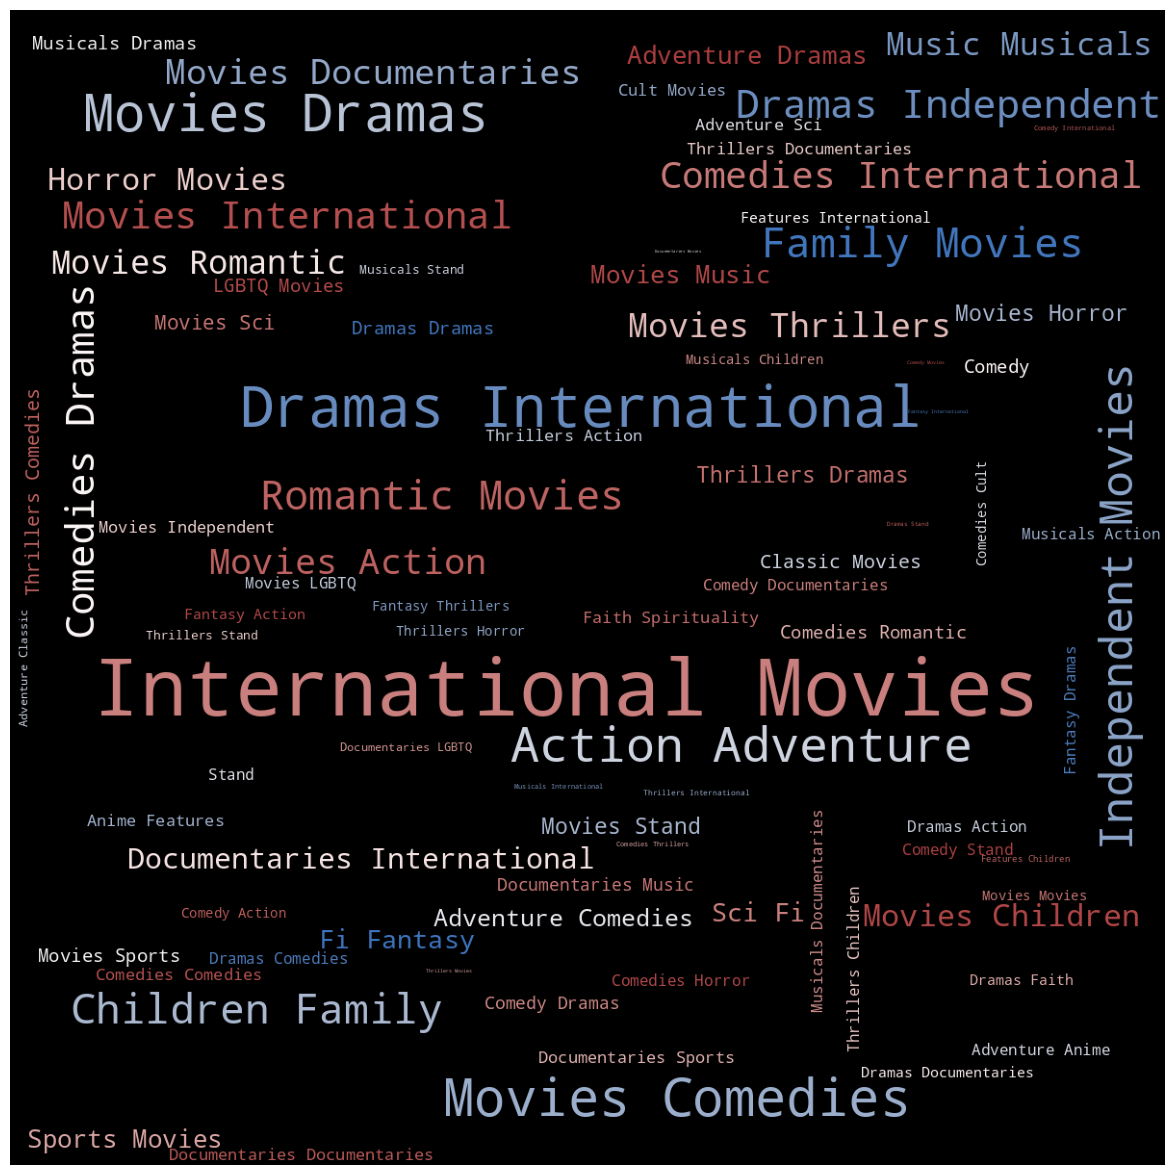

In [46]:
from wordcloud import WordCloud,STOPWORDS

text=' '.join(netflix_movies['listed_in'])

plt.rcParams['figure.figsize']=(15,15)
wordcloud=WordCloud(background_color='black', colormap='vlag', width=1200, height=1200, max_words=121).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

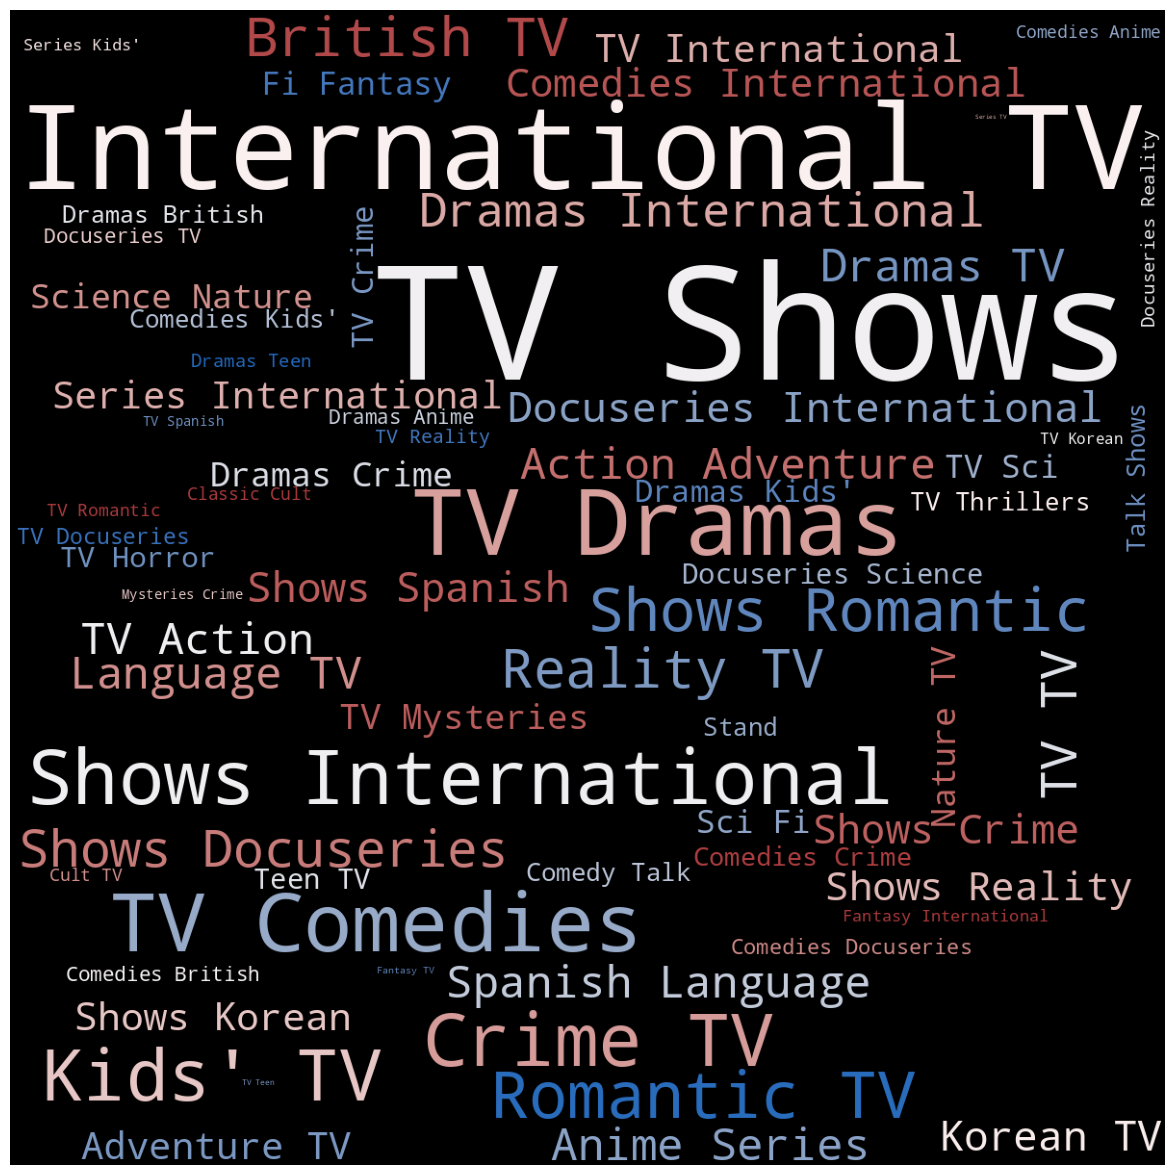

In [47]:
from wordcloud import WordCloud,STOPWORDS

text=' '.join(netflix_shows['listed_in'])

plt.rcParams['figure.figsize']=(15,15)
wordcloud=WordCloud(background_color='black', colormap='vlag', width=1200, height=1200, max_words=121).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   show_id            8797 non-null   object        
 1   type               8797 non-null   object        
 2   title              8797 non-null   object        
 3   director           6173 non-null   object        
 4   cast               7972 non-null   object        
 5   country            8797 non-null   object        
 6   date_added         8797 non-null   datetime64[ns]
 7   release_year       8797 non-null   int64         
 8   rating             8797 non-null   object        
 9   duration           8797 non-null   object        
 10  listed_in          8797 non-null   object        
 11  description        8797 non-null   object        
 12  year_added         8797 non-null   float64       
 13  month_added        8797 non-null   float64       
 14  season_c

#Recomendações
---
- Aqui, vamos recomendar conteúdo de recomendação base


In [51]:
!pip install rake_nltk

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from rake_nltk import Rake

In [53]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'season_counts', 'Principal_country',
       'target_ages'],
      dtype='object')

In [54]:
df_new=df[['title','director','cast','listed_in', 'description']]
df_new.head()

,title,director,cast,listed_in,description
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,NaN,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [60]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [55]:
df_new['director']=df_new['director'].fillna(' ')#preenchendo NaN
df_new['director']=df_new['director'].astype('str')#mudando tipo dados

In [56]:
df_new['cast']=df_new['cast'].fillna(' ')
df_new['cast']=df_new['cast'].astype('str')

In [61]:
df_new['bag_of_word']= ''
for index,row in df_new.iterrows():
    plot = row['description']
    r = Rake()
    r.extract_keywords_from_text(plot)
    keyword_score = r.get_word_degrees()
    g = ''.join(row['listed_in'].split(',')).lower()
    d = ''.join(row['director'].replace(' ','').split(',')).lower()
    a = ' '.join(row['cast'].replace(' ','').split(',')).lower()
    k = ' '.join(list(keyword_score.keys()))
    row['bag_of_word'] = g + ' ' + ' ' + d + ' ' + a + ' ' + k

mydf = df_new[['title','bag_of_word']]
mydf.head()

,title,bag_of_word
0,Dick Johnson Is Dead,documentaries kirstenjohnson father nears en...
1,Blood & Water,international tv shows tv dramas tv mysteries ...
2,Ganglands,crime tv shows international tv shows tv actio...
3,Jailbirds New Orleans,docuseries reality tv feuds flirtations toi...
4,Kota Factory,international tv shows romantic tv shows tv co...


In [62]:
c = CountVectorizer()
count_mat = c.fit_transform(mydf['bag_of_word'])
cosine_sim = cosine_similarity(count_mat,count_mat)
print(cosine_sim)

[[1.         0.         0.         ... 0.         0.04428074 0.        ]
 [0.         1.         0.26142612 ... 0.         0.         0.05216405]
 [0.         0.26142612 1.         ... 0.         0.0278423  0.0556846 ]
 ...
 [0.         0.         0.         ... 1.         0.07302967 0.03651484]
 [0.04428074 0.         0.0278423  ... 0.07302967 1.         0.06666667]
 [0.         0.05216405 0.0556846  ... 0.03651484 0.06666667 1.        ]]


In [63]:
indices = pd.Series(mydf['title'])
def recommend_movie(name):
    movie=[]
    idx = indices[indices == name].index[0]
    sort_index = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10 = sort_index.iloc[1:11]
    for i in top_10.index:
        movie.append(indices[i])
    return movie

In [64]:
recommend_movie('Transformers Prime')

['Transformers: Robots in Disguise',
 'You vs. Wild',
 'Miniforce: Super Dino Power',
 'All Hail King Julien: Exiled',
 'We Bare Bears',
 'Mr. Young',
 '3Below: Tales of Arcadia',
 'Miniforce X',
 'Kipo and the Age of Wonderbeasts',
 'Le K Benzema']

In [65]:
df['title'].head(20)

0                                  Dick Johnson Is Dead
1                                         Blood & Water
2                                             Ganglands
3                                 Jailbirds New Orleans
4                                          Kota Factory
5                                         Midnight Mass
6                      My Little Pony: A New Generation
7                                               Sankofa
8                         The Great British Baking Show
9                                          The Starling
10                  Vendetta: Truth, Lies and The Mafia
11                                     Bangkok Breaking
12                                         Je Suis Karl
13                     Confessions of an Invisible Girl
14                      Crime Stories: India Detectives
15                                    Dear White People
16    Europe's Most Dangerous Man: Otto Skorzeny in ...
17                                      Falsa id

In [66]:
recommend_movie('1983')

['Have You Ever Fallen in Love, Miss Jiang?',
 'Hide & Seek',
 'Paranoid',
 'Kiss Me First',
 'Platoon',
 'Darra',
 'Sintonia',
 'Argon',
 'Young Wallander',
 'The Method']

Os sistemas de recomendação são usados ​​em diversas áreas, com exemplos comumente reconhecidos na forma de geradores de listas de reprodução para serviços de vídeo e música, recomendadores de produtos para lojas on-line ou recomendadores de conteúdo para plataformas de mídia social e recomendadores de conteúdo da web aberta.